In [ ]:
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.formula.api as smf
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# $(1)$

## $(a)$

In [ ]:
df = pd.read_csv('Heart.csv').iloc[:,1:]
df = df.dropna()
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [ ]:
#https://archive.ics.uci.edu/ml/datasets/heart+disease - information source
#Create dummy variables for the categorical variables as new columns

#Male=1
df.rename(columns={"Sex": "Male"},inplace=True)

#Heart Disease (Dependent)
df.loc[:,"Heart Disease"] = [1 if x=="Yes" else 0 for x in df["AHD"]]
df.drop(columns="AHD", inplace=True)

#Chest Pain: Default = Typical Chest Pain
df.loc[:,"Asymptomatic Chest Pain"] = [1 if x=="asymptomatic" else 0 for x in df["ChestPain"]]
df.loc[:,"Nonanginal Chest Pain"]   = [1 if x=="nonanginal" else 0 for x in df["ChestPain"]]
df.loc[:,"Nontypical Chest Pain"]   = [1 if x=="nontypical" else 0 for x in df["ChestPain"]]
df.drop(columns="ChestPain",inplace=True)

#Thal defect: Default = Normal
df.loc[:,"Thal:Fixed"]      = [1 if x=="fixed" else 0 for x in df["Thal"]]
df.loc[:,"Thal:Reversable"] = [1 if x=="reversable" else 0 for x in df["Thal"]]
df.drop(columns="Thal",inplace=True)


#Resting ECG: Default = Normal 
df.loc[:,"RECG:Abnormal"] = [1 if x==1 else 0 for x in df["RestECG"]]
df.loc[:,"RECG:LVH"]      = [1 if x==2 else 0 for x in df["RestECG"]]
df.drop(columns="RestECG",inplace=True)


#Slope of ST Segment: Default = Flat
df.loc[:,"Slope:Upsloping"]   = [1 if x==1 else 0 for x in df["Slope"]]
df.loc[:,"Slope:Downsloping"] = [1 if x==3 else 0 for x in df["Slope"]]
df.drop(columns="Slope",inplace=True)

#Number of Major Vessels: Default = 0
df.loc[:,"Ca: 1"] = [1 if x==1.0 else 0 for x in df["Ca"]]
df.loc[:,"Ca: 2"] = [1 if x==2.0 else 0 for x in df["Ca"]]
df.loc[:,"Ca: 3"] = [1 if x==3.0 else 0 for x in df["Ca"]]
df.drop(columns="Ca",inplace=True)


#Standardizing continuous variables
VartoStdze = ["Age","RestBP","Chol","MaxHR","Oldpeak"]
scale = StandardScaler()
for i in VartoStdze:
    df[i]=scale.fit_transform(df[i].values.reshape(-1,1))

df.describe()

,Age,Male,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,Heart Disease,Asymptomatic Chest Pain,Nonanginal Chest Pain,Nontypical Chest Pain,Thal:Fixed,Thal:Reversable,RECG:Abnormal,RECG:LVH,Slope:Upsloping,Slope:Downsloping,Ca: 1,Ca: 2,Ca: 3
count,2.970000e+02,297.000000,2.970000e+02,2.970000e+02,297.000000,2.970000e+02,297.000000,2.970000e+02,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,-1.237319e-16,0.676768,4.810966e-16,-1.911116e-16,0.144781,5.143660e-16,0.326599,-1.334511e-16,0.461279,0.478114,0.279461,0.164983,0.060606,0.387205,0.013468,0.491582,0.468013,0.070707,0.218855,0.127946,0.067340
std,1.001688e+00,0.468500,1.001688e+00,1.001688e+00,0.352474,1.001688e+00,0.469761,1.001688e+00,0.499340,0.500364,0.449492,0.371792,0.239009,0.487933,0.115462,0.500773,0.499818,0.256768,0.414168,0.334594,0.251033
min,-2.827176e+00,0.000000,-2.125634e+00,-2.337704e+00,0.000000,-3.431849e+00,0.000000,-9.067116e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.241238e-01,0.000000,-6.594306e-01,-7.002541e-01,0.000000,-7.247694e-01,0.000000,-9.067116e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.613719e-01,1.000000,-9.550637e-02,-8.380217e-02,0.000000,1.484822e-01,0.000000,-2.195197e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.148067e-01,1.000000,4.684179e-01,5.519138e-01,0.000000,7.160957e-01,1.000000,4.676723e-01,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.485798e+00,1.000000,3.851964e+00,6.099981e+00,1.000000,2.287949e+00,1.000000,4.419026e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['Male'].corr(df['Heart Disease'])

0.278466696653796

## $(b)$

In [ ]:
X = df.drop(columns="Heart Disease")
y = df["Heart Disease"]
model = sm.Logit(y, sm.add_constant(X)).fit()
model.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.308251
         Iterations 8


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-4.017949,0.850195,-4.725913,0.000002,-5.684302,-2.351597
Age,-0.212378,0.226961,-0.935747,0.349403,-0.657215,0.232458
Male,1.670152,0.552489,3.022957,0.002503,0.587293,2.753011
RestBP,0.491548,0.208329,2.359475,0.018301,0.083230,0.899866
Chol,0.230723,0.212353,1.086507,0.277255,-0.185481,0.646926
Fbs,-0.574079,0.592542,-0.968842,0.332624,-1.735439,0.587281
MaxHR,-0.451075,0.268354,-1.680898,0.092783,-0.977039,0.074888
ExAng,0.653306,0.447446,1.460077,0.144269,-0.223673,1.530285
Oldpeak,0.454812,0.278436,1.633451,0.102374,-0.090913,1.000537
Asymptomatic Chest Pain,2.373287,0.709097,3.346914,0.000817,0.983482,3.763092


Regression interpretation here

## $(c)$

As this is a medical analysis it is likely that we would want to choose a
classification rule that focuses on reducing the missclassification of those 
that do have a heart condition as individuals that do not have a heart condition
ie the false-negative rate as missing an underlying heart condition may prove
fatal. To reduce the class specific rate we can reduce the threshold for which
we classify someone as having a heart condition. In doing so we would make more
false positives and tell people they have a heart condition when they do not 
but this is likely to be an acceptable sacrifice for a hospital especially if 
combined with further tests. We will use a classificaiton rule that states 
that if the probability of someone having a heart condition is greater than 20%
we will classify them as having a heart condition.

## $(d)$

In [ ]:
Xofs=pd.DataFrame(
    {"Male":0,
     "Age":55,
     "RestBP":130,
     "Chol":246,
     "Fbs":0,
     "MaxHR":150,
     "ExAng":1,
     "Oldpeak":1,
     "Asymptomatic Chest Pain":0,
     "Nonanginal Chest Pain":0,
     "Nontypical Chest Pain":0,
     "Thal:Fixed":0,
     "Thal:Reversable":0,
     "RECG:Abnormal":0,
     "RECG:LVH":1,
     "Slope:Upsloping":0,
     "Slope:Downsloping":0,
     "Ca: 1":0,
     "Ca: 2":0,
     "Ca: 3":0},
      index=[0]
                 )
VartoStdze = ["Age","RestBP","Chol","MaxHR","Oldpeak"]
scale = StandardScaler()
for i in VartoStdze:
    Xofs[i]=scale.fit_transform(Xofs[i].values.reshape(-1,1))

In [ ]:
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X,y)
prob = clf.fit(X,y).predict_proba(Xofs)
print(prob)

[[0.85624912 0.14375088]]


Based on this result and the threshold determined above, we would classify as: this patient to not have heart disease as $P(Y=1|X)=0.144<0.2$
Therefore they do not cross the classification boundary conditional upon their characteristics.

## $(e)$

Testing model accuracy requires evaluating the test error rate, in order to acquire this we need a testing sample, in this case, we have used all the data to train the model. Although question (d) offers an observation, we do not know this patients true state to determine whether model classified her correctly or not.

## $(f)$

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=207, random_state=10)

## $(g)$

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        56
           1       0.70      0.88      0.78        34

    accuracy                           0.81        90
   macro avg       0.81      0.83      0.81        90
weighted avg       0.83      0.81      0.81        90

Test error rate: 0.189


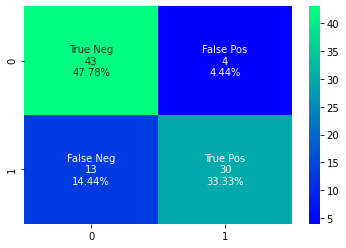

In [ ]:
logit = skl_lm.LogisticRegression(solver='newton-cg')
logit.fit(X_train,y_train)
prob = logit.predict_proba(X_test)
#Index 1 = pr(0) and Index 2 = pr(1)

testclf=[]
for i in range(len(prob)):
    if (prob[i][1]>0.46)==True:
        testclf.append(1)
    else:
        testclf.append(0)

print(classification_report(y_test, testclf, digits=2))

cf_matrix=confusion_matrix(y_test, testclf).T

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='winter')
        
error_rate_logit1 = 1-accuracy_score(y_test, testclf)
print("Test error rate:",round(error_rate_logit1,3))

The test error rate for this test sample is 0.189, implying that around 19% of its classifications were incorrect, which means this model is performing fairly well.

## $(h)$

              precision    recall  f1-score   support

           0       0.95      0.38      0.54        56
           1       0.49      0.97      0.65        34

    accuracy                           0.60        90
   macro avg       0.72      0.67      0.59        90
weighted avg       0.78      0.60      0.58        90

Test error rate: 0.4


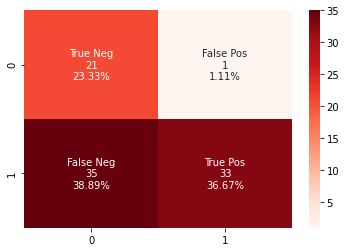

In [ ]:
import random
random.seed(10)
randomclf = []
for i in range(207):
    n = random.choice([0,1])
    randomclf.append(n)
    
logit.fit(X_train,randomclf)
prob = logit.predict_proba(X_test)

testclf=[]
for i in range(len(prob)):
    if (prob[i][1]>0.46)==True:
        testclf.append(1)
    else:
        testclf.append(0)
        
print(classification_report(y_test, testclf, digits=2))

cf_matrix=confusion_matrix(y_test, testclf).T

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Reds')

error_rate_logit2 = 1-accuracy_score(y_test, testclf)
print("Test error rate:",round(error_rate_logit2,3))

## $(i)$

Using the random generator function we achieve a result of 0.4 which means that 40% of the observations were misclassified, in comparison to the above which misclassified at around half of that. Therefore based on this random sample which determined whether not an individual had heart disease with a probability of 50%, the previous model performed better compared to a situation where the members of the sample had heart disease at random.

# $(2)$

## $(a)$

              precision    recall  f1-score   support

           0       0.85      0.80      0.83        56
           1       0.70      0.76      0.73        34

    accuracy                           0.79        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.79      0.79      0.79        90

Test error rate: 0.211


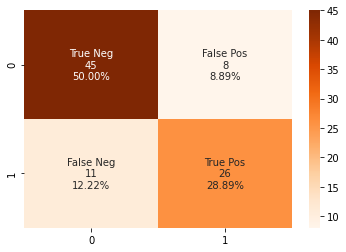

In [ ]:
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knnpred5 = knn5.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, knnpred5, digits=2))

cf_matrix=confusion_matrix(y_test, knnpred5).T

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Oranges')

error_rate_knn5 = 1-accuracy_score(y_test, knnpred5)
print("Test error rate:",round(error_rate_knn5,3))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        56
           1       0.76      0.74      0.75        34

    accuracy                           0.81        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.81      0.81      0.81        90

Test error rate: 0.189


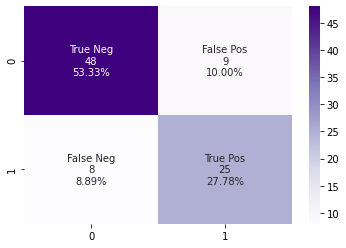

In [ ]:
knn10 = neighbors.KNeighborsClassifier(n_neighbors=10)
knnpred10 = knn10.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, knnpred10, digits=2))

cf_matrix=confusion_matrix(y_test, knnpred10).T

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Purples')

error_rate_knn10 = 1-accuracy_score(y_test, knnpred10)
print("Test error rate:",round(error_rate_knn10,3))

## $(b)$

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        56
           1       0.67      0.82      0.74        34

    accuracy                           0.78        90
   macro avg       0.77      0.79      0.77        90
weighted avg       0.80      0.78      0.78        90

Test error rate: 0.222


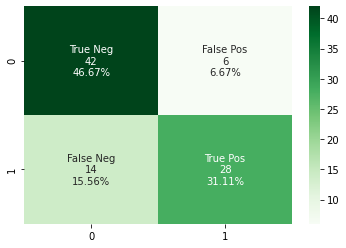

In [ ]:
lda = LinearDiscriminantAnalysis()
ldapred = lda.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, ldapred, digits=2))

cf_matrix=confusion_matrix(y_test, ldapred).T

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Greens')


error_rate_lda = 1-accuracy_score(y_test, ldapred)
print("Test error rate:",round(error_rate_lda,3))

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

           0       0.88      0.12      0.22        56
           1       0.40      0.97      0.57        34

    accuracy                           0.44        90
   macro avg       0.64      0.55      0.39        90
weighted avg       0.70      0.44      0.35        90

Test error rate: 0.556


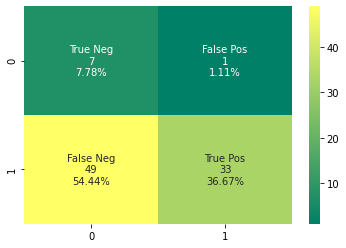

In [ ]:
qda = QuadraticDiscriminantAnalysis()
qdapred = qda.fit(X_train, y_train).predict(X_test)


print(classification_report(y_test, qdapred, digits=2))

cf_matrix=confusion_matrix(y_test, qdapred).T

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='summer')

error_rate_qda = 1-accuracy_score(y_test, qdapred)
print("Test error rate:",round(error_rate_qda,3))

## $(c)$

In [ ]:
print("logit Test error rate:",round(error_rate_logit1,3))
print("knn (k=5) Test error rate:",round(error_rate_knn5,3))
print("knn (k=10)Test error rate:",round(error_rate_knn10,3))
print("LDA Test error rate:",round(error_rate_lda,3))
print("QDA Test error rate:",round(error_rate_qda,3))

logit Test error rate: 0.189
knn (k=5) Test error rate: 0.211
knn (k=10)Test error rate: 0.189
LDA Test error rate: 0.222
QDA Test error rate: 0.556


From the above we see that the KNN with k=10 yields the lowest number of misclassifications. Followed by KNN with k=5 and LDA both which yield the same test error rate, followed by QDA and then the logit which performs the worst amongst the 5 methods. Despite the KNN with k=5 being the more flexible model, the model with k=10 performed better despite being less flexible.

## $(d)$

Using train test split changes the outcome again and again depending on how the function determines the 4 samples - use K-fold instead.

In [ ]:
models = [logit,knn5,knn10,lda,qda]
te=[]
for i in models:
    te=te+[(100-model_selection.cross_val_score(i,X,y,cv=model_selection.KFold(n_splits=10)).mean()*100.0)]    
te=pd.DataFrame(te)
te
#print("Test Error: %.2f%%" % (100-model_selection.cross_val_score(i,X,y,cv=model_selection.KFold(n_splits=10)).mean()*100.0)) 

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,0
0,13.850575
1,22.574713
2,19.885057
3,13.505747
4,18.160920


## $(e)$

The model with the lowest test error rate using 10-fold CV is linear discriminant analysis - using patient Xofs from before we can reclassify to see how the model performs.

In [ ]:
model_selection.cross_val_predict(lda,X,y,cv=model_selection.KFold(n_splits=10))
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train).predict_proba(Xofs)

array([[0.8849061, 0.1150939]])

## $(f)$

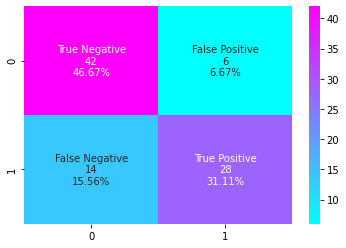

In [ ]:
cf_matrix=confusion_matrix(y_test, ldapred).T

group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='cool')